Importo las librerias a utilizar

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

Cargo la base de datos a un DataFrame y obtenemos una visión general de los datos

In [8]:
df = pd.read_csv('C:/Users/Tino/Documents/Documentos/Data/Kaggle/Titanic/train.csv')
df_test = pd.read_csv('C:/Users/Tino/Documents/Documentos/Data/Kaggle/Titanic/test.csv')

testIDs = df_test['PassengerId']


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Reviso el tipo de datos y la cantidad de registros

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Analizo valores distintos para cada variable

In [10]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Analizo la presencia de nulos

In [11]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Visualizamos las variables numericas en forma de Boxplots para ver su distribución

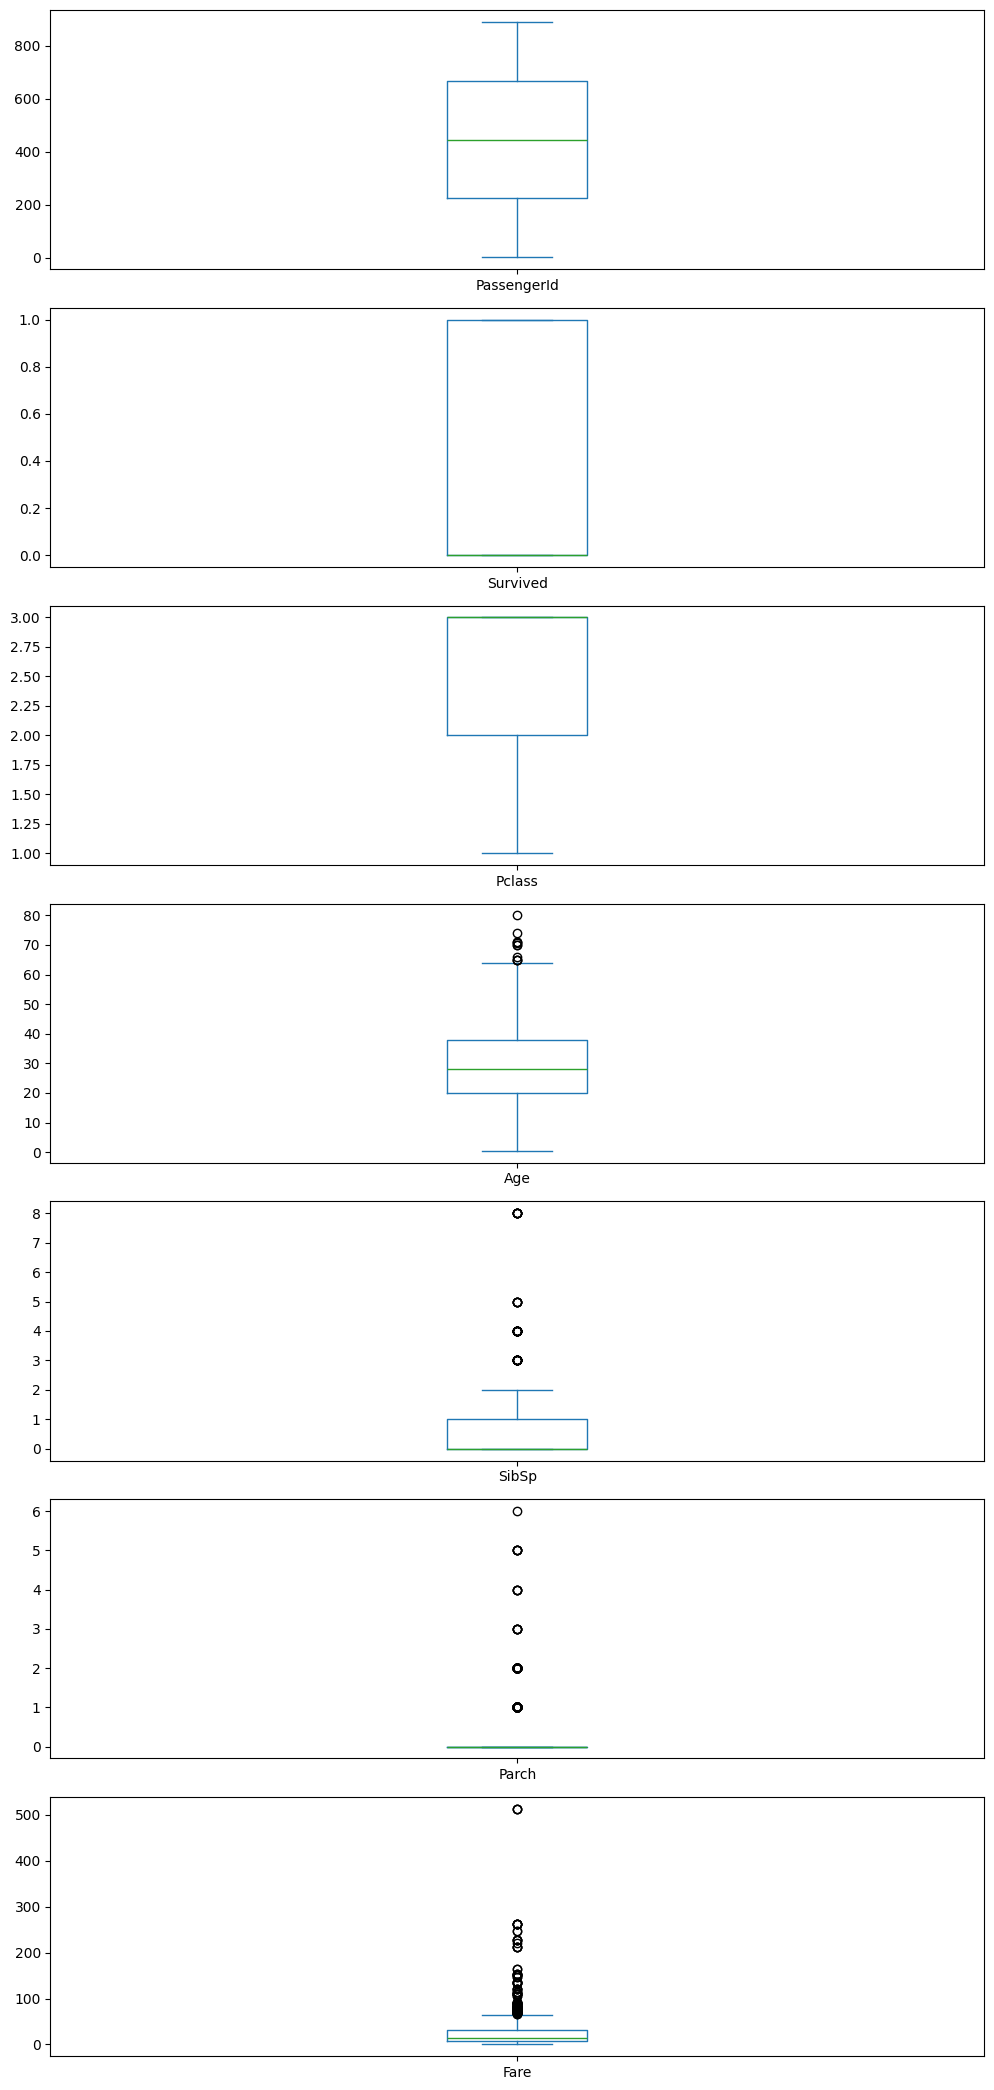

In [14]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_columns].plot(kind='box', subplots=True, layout=(len(numerical_columns), 1), figsize=(10, len(numerical_columns) * 3), sharex=False, sharey=False)

plt.tight_layout()
plt.show()




-La distribución del ID no es informativa por tratarse de un ID.

-La de supervivencia tampoco ya que se trata de una variable de tipo booleana (toma dos valores)

-Vemos que en la clase, el 75% de la distribucion (entre Q0-Q3) pertenece a las clases 1 y 2.

-La mediana de la edad se encuentra aproximadamente en los 30 años. Se observan outliers de personas ancianas con valores aceptables para el rango.

-El 75% de la distribución tiene a lo sumo 1 acompañante ya sea pareja/hermanos. Se observan algunos datos de alto valor numerico seguramente
correspondientes a familias de muchos hermanos (probablemente de baja edad).

-La mayor parte de los pasajeros viaja sin hijos o padres a bordo.



Completamos los nulos de edad con la mediana de la variable

In [15]:
mediana_edad = df['Age'].median()
df['Age'].fillna(mediana_edad, inplace=True)

mediana_edad_test = df_test['Age'].median()
df_test['Age'].fillna(mediana_edad_test, inplace=True)

C:\Users\Tino\AppData\Local\Temp\ipykernel_3752\2354298872.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mediana_edad, inplace=True)
C:\Users\Tino\AppData\Local\Temp\ipykernel_3752\2354298872.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

Completamos valores nulos de Embarked con la moda

In [16]:
moda_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(moda_embarked, inplace=True)

moda_embarked_test = df['Embarked'].mode()[0]
df_test['Embarked'].fillna(moda_embarked_test, inplace=True)

df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

df_test.isnull().sum()

C:\Users\Tino\AppData\Local\Temp\ipykernel_3752\836646037.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(moda_embarked, inplace=True)
C:\Users\Tino\AppData\Local\Temp\ipykernel_3752\836646037.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

Analizamos los estadisticos y la distribución basica de las variables

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observando estos estadísticos podemos decir que:

-La base de datos es de 891 pasajeros, de los cuales sobrevivieron el 38,3% de ellos.

-Menos del 25% se encontraba en 1era clase.

-La edad media es de 29,3 años.

-Al menos el 75% de los pasajeros viaja solo, con la pareja o un hermano.

-La mayoria de los pasajeros viaja sin hijos o padres.

-La media de la tarifa es de 32,2 USD. El 75% pago como máximo 31 USD.





Dado que Cabin posee valores nulos en aproximadamente 670 registros, dropeamos la variable para que no distorsione los resultados del modelo.

Dropeamos tambièn el ID y el nombre ya que no tienen ningun tipo de valor informativo.

Dropeamos Ticket ya que existen muchos valores unicos y tampoco sería rico a nivel informativo.

In [19]:
df = df.drop(['Cabin','PassengerId','Name','Ticket'], axis=1)

df_test = df_test.drop(['Cabin','PassengerId','Name','Ticket'], axis=1)

df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


Transformamos la variable cualitativa a una cuantitativa para hacer una correlacion de variables

In [20]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S


Transfromamos la variable de Emabarque a cualitativa

In [21]:
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S':2})

df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S':2})

df_test.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,2
4,3,1,22.0,1,1,12.2875,2


Ploteo los KDE superpuestos de las variables continuas como asi también los graficos de barras de las distintas variables cualitativas discriminando por superviencia.

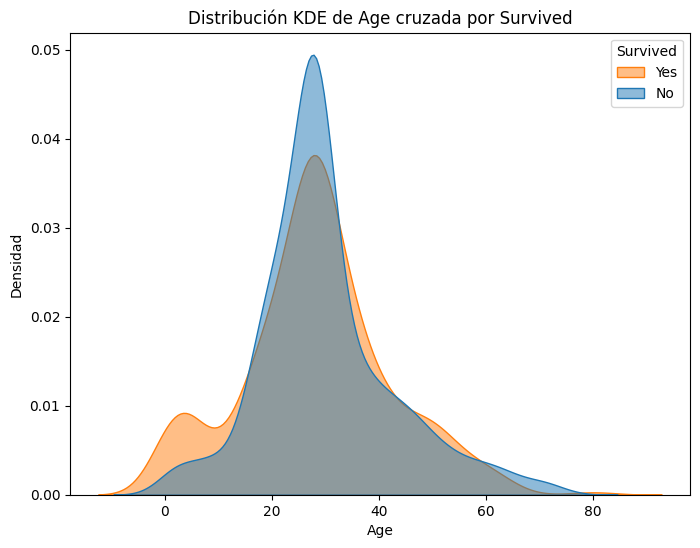

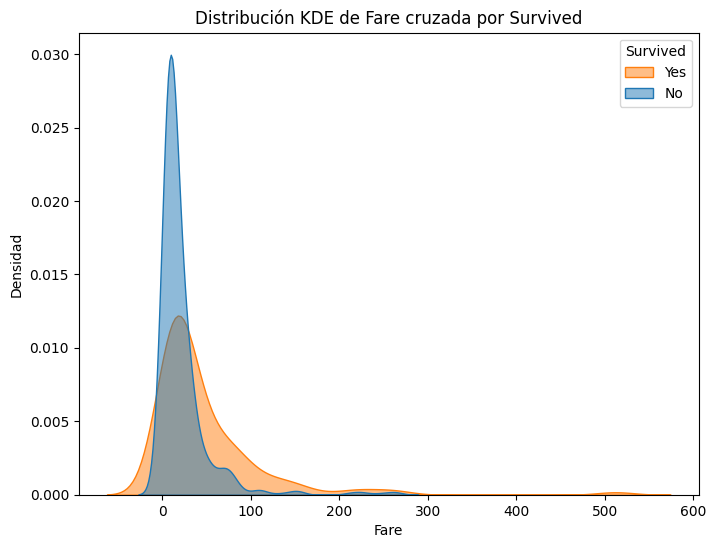

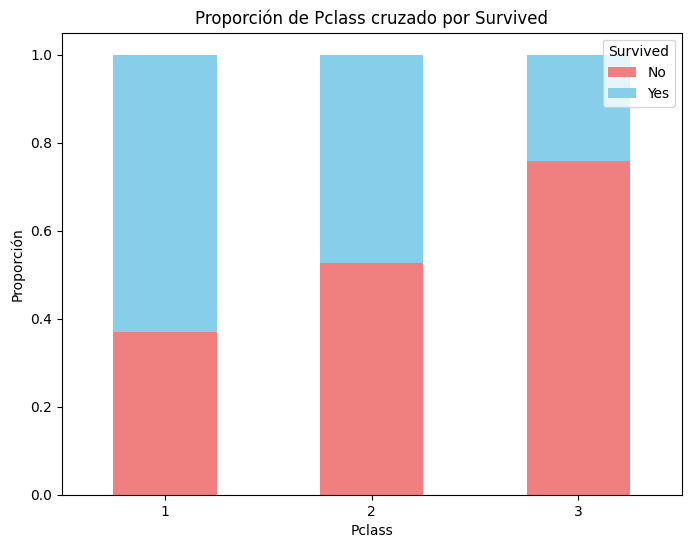

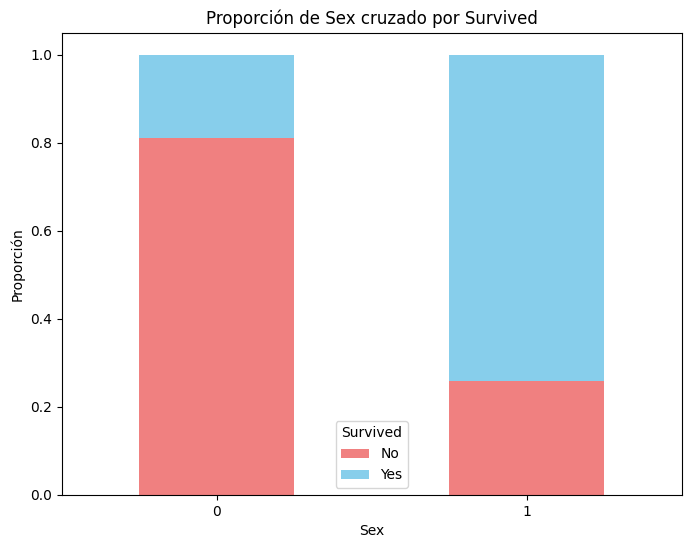

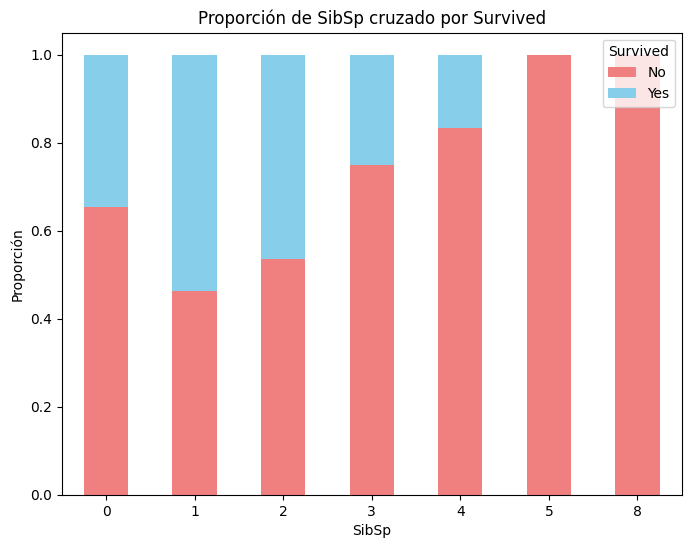

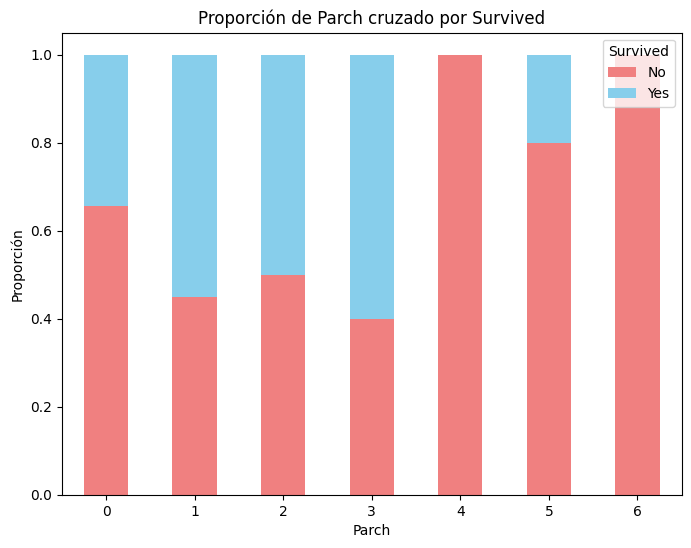

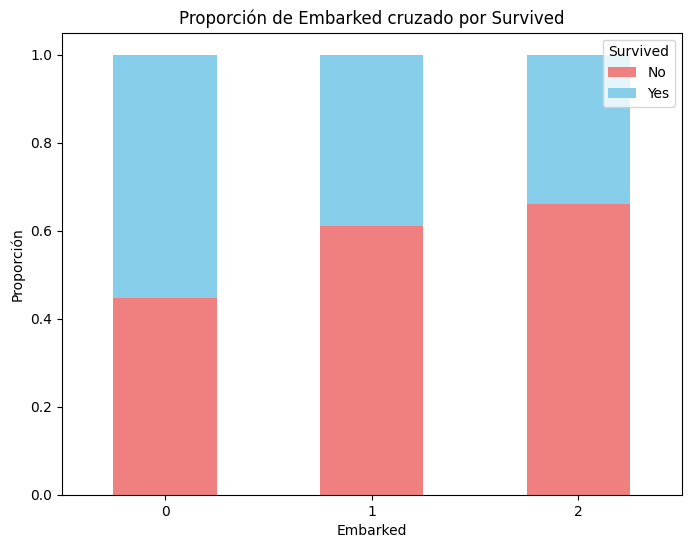

In [37]:
# Especifico las variables cuantitativas a graficar en KDE
variables_a_graficar = ['Age', 'Fare']

# Creo un gráfico KDE para cada columna numérica, discriminando por supervivencia
for column in variables_a_graficar:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=column, hue='Survived', common_norm=False, fill=True, alpha=0.5)
    plt.title(f'Distribución KDE de {column} cruzada por Survived')
    plt.xlabel(column)
    plt.ylabel('Densidad')
    plt.legend(title='Survived', labels=['Yes', 'No'] )
    plt.show()

# Especifico las variables a graficar en barras
variables_a_graficar_barras = ['Pclass', 'Sex', 'SibSp','Parch','Embarked']  # Reemplaza con los nombres de las columnas que te interesan

for column in variables_a_graficar_barras:
    # Calculo las proporciones de supervivientes/ no supervivientes
    prop_df = df.groupby([column, 'Survived']).size().unstack().fillna(0)
    prop_df = prop_df.div(prop_df.sum(axis=1), axis=0)

    # Grafico los graficos de barras con las proporciones "stackeadas"
    prop_df.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'], figsize=(8, 6))
    plt.title(f'Proporción de {column} cruzado por Survived')
    plt.xlabel(column)
    plt.ylabel('Proporción')
    plt.legend(title='Survived', labels=['No', 'Yes'])
    plt.xticks(rotation=0)
    plt.show()

-Analizando el KDE observamos como a menor edad la proporcion de pasajeros que sobreviven aumenta(sobretodo entre los 0 y los 10 años aproximadamente)

-Se observa tambien que a mayores tarifas la proporcion de supervivientes aumenta. Esto se visualiza sobretodo
a tarifas altas, donde la relacion de supervivientes aumenta comparada con la otra curva.

-A partir de los graficos de barras, observamos tambien que la clase es un factor determinante. A simple vista podemos ver que más del 60% de los pasajeros en primera clase sobreviven, en contraste con el 20% de tercera clase.

-El género definitivamente es un factor influyente, observando que solo sobrevivio aproximadamente el 20% de los hombres, mientras que la tasa para las mujeres es de casi el 80%.

-Vemos que aquellos que tienen 1 o 2 pareja/hermanos poseen una tasa de supervivencia mayor. Al parecer, familias numerosas decae de forma importante la supervivencia. Lo mismo sucede con los pasajeros que viajan sin pareja/hermanos.

-Segun el grafico de barras de hijos/padres vemos también que las familias pequeñas (hasta 3 hijos/padres) son aquellas con mayor proporcion de supervivientes. Se ven disminuida la supervivencia en las familias grandes y los pasajeros sin hijos/padres.

-Segun el ultimo grafico de barras, observamos que por algun motivo los pasajeros que embaracaron en Cherbourg tuvieron mayor probabilidad de sobrevivir.




Realizo la matriz de correlacion entre las variables para utilizar en un heatmap y asi evaluar la relación existente entre las mismas

In [34]:
correlation_matrix = df.corr()
print(correlation_matrix)

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481  0.543351 -0.064910 -0.035322  0.081629   
Pclass   -0.338481  1.000000 -0.131900 -0.339898  0.083081  0.018443   
Sex       0.543351 -0.131900  1.000000 -0.081163  0.114631  0.245489   
Age      -0.064910 -0.339898 -0.081163  1.000000 -0.233296 -0.172482   
SibSp    -0.035322  0.083081  0.114631 -0.233296  1.000000  0.414838   
Parch     0.081629  0.018443  0.245489 -0.172482  0.414838  1.000000   
Fare      0.257307 -0.549500  0.182333  0.096688  0.159651  0.216225   
Embarked -0.167675  0.162098 -0.108262 -0.018754  0.068230  0.039798   

              Fare  Embarked  
Survived  0.257307 -0.167675  
Pclass   -0.549500  0.162098  
Sex       0.182333 -0.108262  
Age       0.096688 -0.018754  
SibSp     0.159651  0.068230  
Parch     0.216225  0.039798  
Fare      1.000000 -0.224719  
Embarked -0.224719  1.000000  


Utilizo la matrix de correlacion para realizar el heatmap

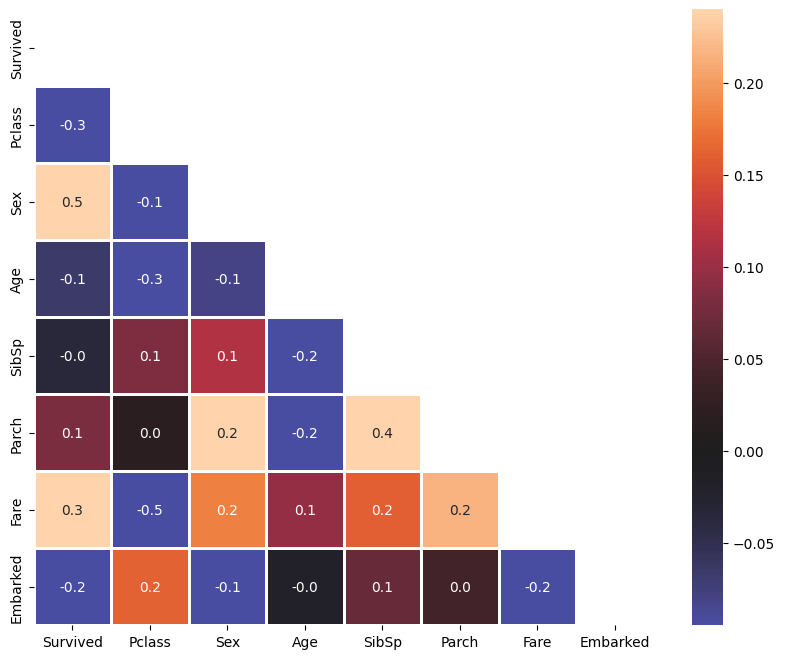

In [35]:
plt.figure(figsize=(10, 8))
#Quito la imagen especular de la matrix para mejor visualización
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, fmt=".1f", mask=mask, annot=True, linecolor='white', robust=True,
                linewidths='1', cmap='icefire', vmin=-0.095, vmax=0.24, center=0)
plt.show()

-A partir de la matrix podemos reafirmar observaciones previas, como la relación entre el sexo y la tarifa en la supervivencia.
Tambien vemos la relacion inversa con la clase del boleto (a clases mas economicas, menor supervencia).

-La clase del boleto es inversa a la edad, indicando que en clases ecomonicas la edad es menor (y en primera el promedio de edad sera
mayor). Obviamente, la tarifa es inversa a la clase.

-Se evidencia que el hecho de ser mujer correlaciona positivamente con la tarifa. Lo mismo con la presencia de padres/hijos, inidicando que las mujeres viajan en mayor frecuencua con hijos/padres. También sucede con los hermanos/parejas. Es decir que suelen viajar acompañadas
con mas frecuencia que los hombres. A su vez, el promedio de edad de las mujeres es menor.

-A mayor edad, la tarifa del boleto suele ser mas alta. Por otro lado, correlaciona inversamente con la presencia de parejas/hermanos/padres
e hijos. 

-Viajar con pareja/hermanos correlaciona con la tarifa del boleto y la presencia de padres/hijos. Esto indica la presencia de familias.

-Viajar con padres/hijos correlaciona con la tarifa.

-La correlacion negativa entre punto de embarque y supervivencia verifia lo observado anteriormente que Cherbourg (codificado como 0) tiene una tasa de supervivencia superior a los otros dos puntos.




Realizamos un modelo de regresión logística

In [38]:
# Defino las variables a utilizar para el modelo y la variable target (Supervivencia)
features = ['Age', 'Fare','Pclass', 'Sex','SibSp','Parch','Embarked']
X = df[features]
y = df['Survived']

# Divido el dataset en conjuntos de entrenamiento y prueba (80% training - 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizo las variables de entrenamiento y prueba
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entreno el modelo de regresión logística con los datasets spliteados
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizo las predicciones con el set de testeo
y_pred = model.predict(X_test)

# Evaluo el modelo obteniendo el accuracy, la matriz de confusión y el reporte de clasificación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.80
Confusion Matrix:
[[90 15]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



-En base a los resultados arrojados por el modelo de regresión logística, podemos decir que se obtuvieron métricas satisfactorias.

-El accuracy nos da una idea global de precisión del modelo, resultado certero en el 80% de los casos.

-La precisión para aquellos que no sobrevivieron resulta levemente más alta que para los supervivientes.

-El recall nos permite dar una idea de la proporción de casos del total de la muestra que fueron correctamente predichos. Vemos que el modelo funciona también levemente mejor para predecir los registros de pasajeros que no sobrevivieron.

-Dado que el f1-score combina ambas metricas (precision, recall) el valor es superior para los casos de no supervivencia.

-Debemos tener en cuenta que dadas las características del dataset, existe una mayor cantidad de pasajeros que no sobrevivieron.
La tasa de supervivencia del dataset original es de aproximadamente del 38%, mientras que del "split" del testeo de 41% (teniendo en cuenta los soportes de cada una de las clases). De esta manera podemos decir que el test set seria bastante representativo en cuanto a esta proporción.




Procedo entonces a utilizar el modelo con un dataset de testeo (que no posee la información de supervivencia)

In [41]:
# Defino las variables a utilizar y cargo el DataFrame de test
features = ['Age', 'Fare','Pclass', 'Sex','SibSp','Parch','Embarked']
X_train = df[features]
y_train = df['Survived']
X_test = df_test[features]


# Escalo el dataset de testeo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Realizo el modelo de regresión logística con el dataset de entrenamiento
model = LogisticRegression()
model.fit(X_train, y_train)


# Realizo las  predicciones con el dataset de testeo
y_pred = model.predict(X_test)


# Creo un DataFrame con los resultados incorporando el ID de cada pasajero
output = pd.DataFrame({'PassengerId': testIDs, 'Survived': y_pred})

# Guardo los resultados en un archivo CSV
output.to_csv('submission.csv', index=False)


print(output)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


De esta manera, pudimos obtener una predicción de todos los pasajeros en el dataset de testeo a partir de un modelo de regresión logística entrenado con el dataset de entrenamiento.